In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from IPython.display import display

In [2]:
banking_data = pd.read_excel('./data/Churn-Modelling.xlsx')
banking_data.drop('RowNumber', axis=1, inplace=True)
banking_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
display(banking_data.describe(include=['O']))
display(banking_data.drop('CustomerId', axis=1).describe())

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.7+ KB


In [14]:
def chi_square(df, feature, target):
    
    table = pd.crosstab(df[feature], df[target])
    _, p, *_ = stats.chi2_contingency(table.values)
    
    return p

def chi2_significance_test(df, feature, target, confidence_level = .05):
    p = chi_square(df, feature, target)
    
    return p < confidence_level
        
    
proportion_leaving = banking_data['Exited'].mean()

print(f"The proportion of customers leaving: {proportion_leaving*100:.0f}%")

The proportion of customers leaving: 20%


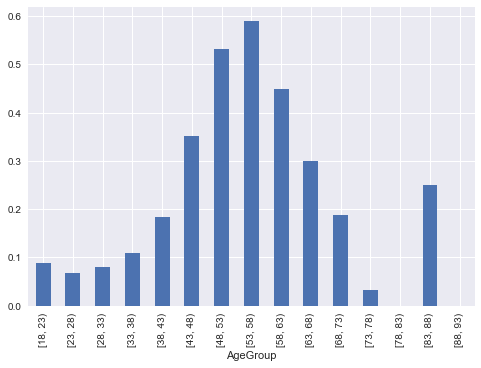

In [35]:
banking_data['AgeGroup'] = pd.cut(banking_data['Age'], range(18, 94, 5), right=False)
banking_data.groupby('AgeGroup')['Exited'].mean().plot.bar()

In [41]:
banking_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Validation
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"[38, 43)",2
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"[38, 43)",1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"[38, 43)",4
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"[38, 43)",4
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"[43, 48)",8


Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


p = 0.0000


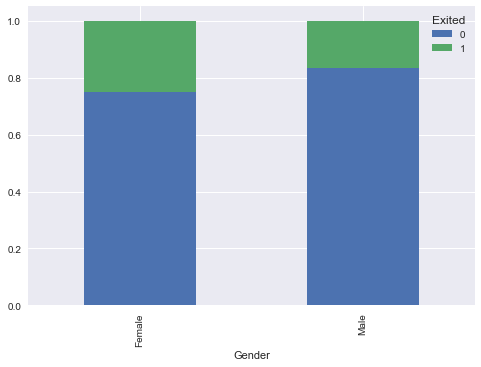

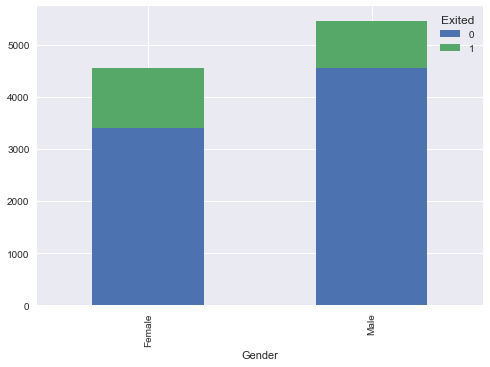

In [16]:
banking_data_gender = banking_data.groupby('Gender')
gender_proportion = banking_data_gender['Exited'].mean()

table = pd.crosstab(banking_data['Gender'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)

table.apply(lambda x: x/table.sum(axis=1)).plot.bar(stacked=True)

table.plot.bar(stacked=True)

print(f'p = {p:.4f}')

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


p = 0.4924


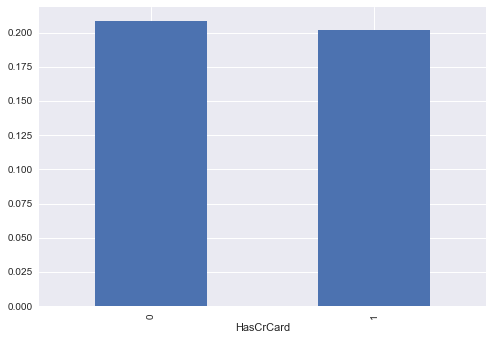

In [17]:
banking_data_card = banking_data.groupby('HasCrCard')
card_proportion = banking_data_card['Exited'].mean()

table = pd.crosstab(banking_data['HasCrCard'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)

card_proportion.plot.bar()
print(f'p = {p:.4f}')

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


p = 0.0000


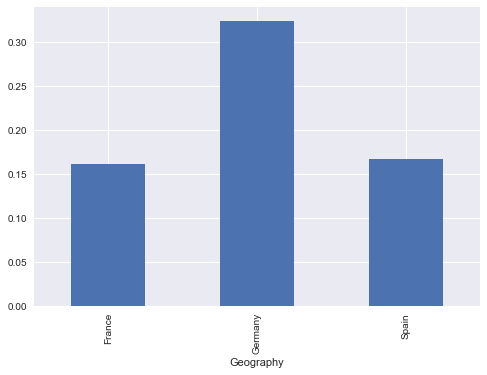

In [18]:
table = pd.crosstab(banking_data['Geography'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'p = {p:.4f}')
banking_data.groupby('Geography')['Exited'].mean().plot.bar()

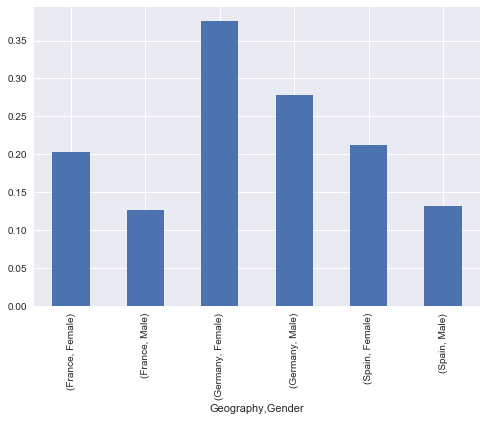

In [19]:
banking_data.groupby(['Geography', 'Gender'])['Exited'].mean().plot.bar()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: Exited, dtype: int64


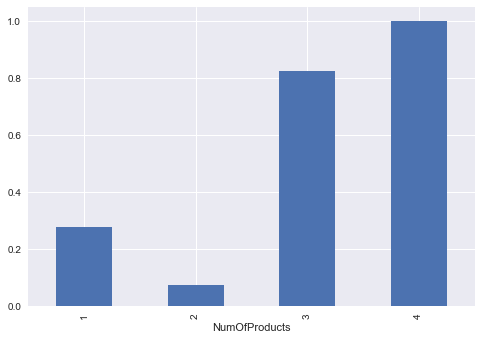

In [20]:
banking_data.groupby('NumOfProducts')['Exited'].mean().plot.bar()
print(banking_data.groupby('NumOfProducts')['Exited'].count())

In [5]:
banking_data['Validation'] = banking_data['CustomerId'] % 10
banking_data.drop('CustomerId', axis=1, inplace=True)
banking_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Validation
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,8


Exited,0,1
Validation,,
0,796,213
1,803,214
2,781,189
3,750,213
4,847,203
5,785,176
6,811,224
7,787,201
8,778,218


p = 0.2771


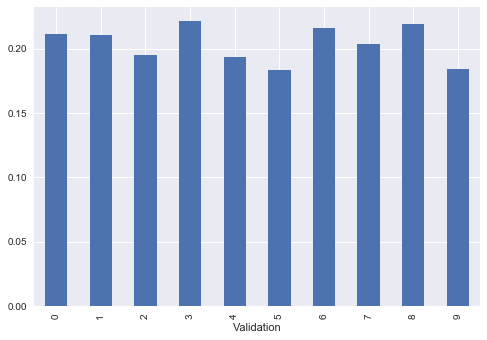

In [6]:
banking_data_validation = banking_data.groupby('Validation')
table = pd.crosstab(banking_data['Validation'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'p = {p:.4f}')
banking_data_validation['Exited'].mean().plot.bar()

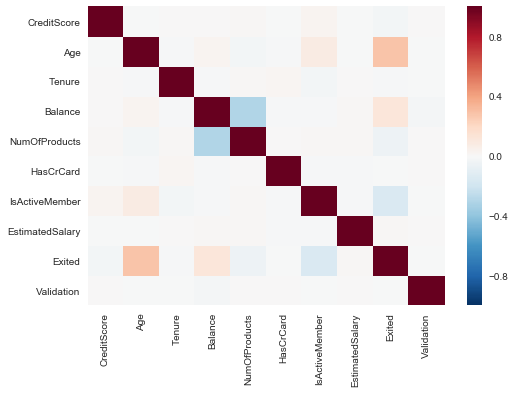

In [23]:
corr = banking_data.corr()

sns.heatmap(corr)

In [17]:
f = lambda col: chi2_significance_test(banking_data, col, 'Exited')
for col in banking_data.columns[:-2]:
    print(f"{col} significant {f(col)}")

Surname significant False
CreditScore significant True
Geography significant True
Gender significant True
Age significant True
Tenure significant False
Balance significant True
NumOfProducts significant True
HasCrCard significant False
IsActiveMember significant True
EstimatedSalary significant False


In [36]:
cols = ['Surname', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Validation', 'Exited', 'Age']
target = banking_data['Exited']
data = banking_data.drop(cols, axis=1)
data[['CreditScore', 'Balance']] = pre.scale(data[['CreditScore', 'Balance']])
data.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,IsActiveMember,AgeGroup
0,-0.326221,France,Female,-1.225848,1,1,"[38, 43)"
1,-0.440036,Spain,Female,0.117350,1,1,"[38, 43)"
2,-1.536794,France,Female,1.333053,3,0,"[38, 43)"
3,0.501521,France,Female,-1.225848,2,0,"[38, 43)"
4,2.063884,Spain,Female,0.785728,1,1,"[43, 48)"


In [37]:
data=pd.get_dummies(data)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3)

cls = LogisticRegression()

cls.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
accuracy_score(y_test, cls.predict(X_test))

0.82899999999999996

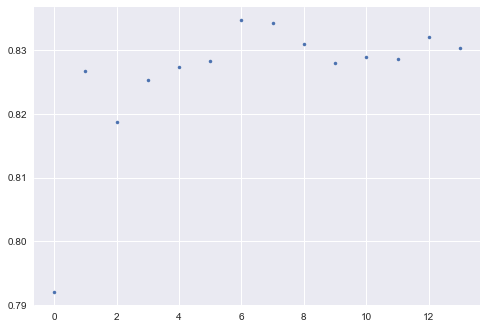

In [40]:
acc = []
for k in range(1, 15):
    cls = KNeighborsClassifier(k)
    cls.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, cls.predict(X_test)))
    
plt.plot(acc, '.')

In [41]:
cls = SVC()
cls.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
accuracy_score(y_test, cls.predict(X_test))

0.83533333333333337

In [43]:
cls = DecisionTreeClassifier(max_depth=5)
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.83666666666666667

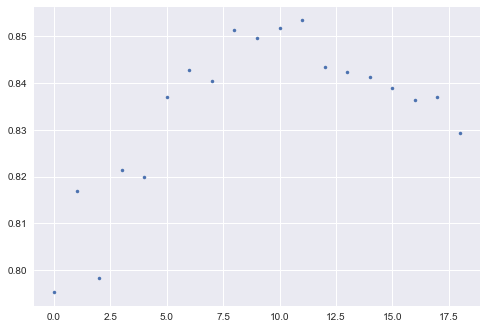

In [44]:
acc = []
for n in range(1, 20):
    cls = RandomForestClassifier(max_depth=n)
    cls.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, cls.predict(X_test)))
    
plt.plot(acc,'.')

In [45]:
cls = MLPClassifier(activation='logistic', alpha=.0000001)
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.82799999999999996

In [46]:
cls = AdaBoostClassifier()
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.85366666666666668

In [48]:
cross_val_score(AdaBoostClassifier(), data, target, cv=30)

array([ 0.85329341,  0.8502994 ,  0.86227545,  0.84431138,  0.8742515 ,
        0.85928144,  0.86526946,  0.8742515 ,  0.8742515 ,  0.86826347,
        0.84131737,  0.86526946,  0.86227545,  0.85285285,  0.84084084,
        0.84684685,  0.85585586,  0.85585586,  0.85585586,  0.87387387,
        0.84984985,  0.87987988,  0.85585586,  0.85885886,  0.84384384,
        0.84384384,  0.84384384,  0.85240964,  0.88253012,  0.8313253 ])

C:\Users\Achilles\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


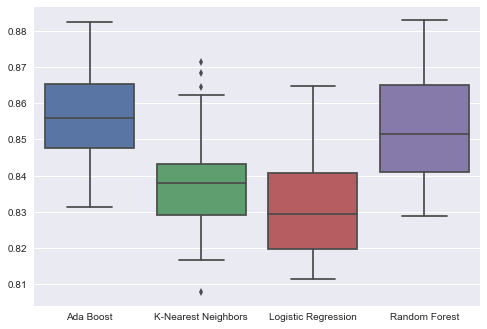

In [51]:
classifiers = [LogisticRegression(), AdaBoostClassifier(), RandomForestClassifier(max_depth=12), KNeighborsClassifier(10)]

names = ["Logistic Regression", "Ada Boost", 'Random Forest', 'K-Nearest Neighbors']
scores = {}

for classifer, name in zip(classifiers, names):
    scores[name] = cross_val_score(classifer, data, target, cv=30)
    
sns.boxplot(pd.DataFrame(scores))

In [50]:
cls = AdaBoostClassifier()
cross_val_score(cls, data, target, cv=100).mean()

0.85620538053805362